<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/HW1/HT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание №1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос "Для чего фиксируем сиды в домашках?" - *чтобы батчи при разбивке данных были одинаковыми, так как модели сильно зависимы от структуры данных и разные наборы в батчах будут давать разные результаты*

#Часть 1 (2.5 балла + 0.75) | EDA

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) Отобразите 10 случайных строк тренировочного датасета

In [ ]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) Отобразите первые 5 и последние 5 объектов тестового датасета

In [ ]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [ ]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста.

In [ ]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [ ]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [ ]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) Посмотрите, есть ли в датасете пропуски.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Если есть, то в каких колонках?:

df_train, df_test: mileage , engine, max_power  , torque , seats  

(0.1 балла) Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько?

In [ ]:
df_train.loc[: , df_train.columns != 'selling_price'][df_train.loc[: , df_train.columns != 'selling_price'].duplicated()].shape

(1159, 12)

(0.15 балла) Отобразите такие объекты

In [ ]:
df_train.loc[: , df_train.columns != 'selling_price'].head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


(0.15 балла) Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [ ]:
indx_drop = df_train.loc[: , df_train.columns != 'selling_price'][df_train.loc[: , df_train.columns != 'selling_price'].duplicated()].index

In [ ]:
mask = np.in1d(df_train.index.to_list(), indx_drop, invert=True)

In [ ]:
 df_train = df_train.loc[mask, :]

In [ ]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, обновите индексы строк таким образом, чтобы они шли от 0 без пропусков

In [ ]:
df_train.reindex()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками mileage, engine, max_power и torque всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:

* убрать единицы измерения для признаков ``mileage, engine, max_power``. * кастануть эти столбцы столбцы к ``float``. * удалить столбец ``torque``


   |Все действия нужно производить над обоими датасетами
________________________________________________________________________________

In [ ]:
df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].apply(lambda x: x.map(lambda x: str(x).split(' ')[0]))

In [ ]:
df_train.loc[4217, 'max_power'] = 'nan'

In [ ]:
df_train['mileage'] = df_train['mileage'][df_train['mileage'] != 'nan'].astype(float)
df_train['engine'] = df_train['engine'][df_train['engine'] != 'nan'].astype(float)
df_train['max_power'] = df_train['max_power'][df_train['max_power'] != 'nan'].astype(float)

In [ ]:
df_train[['mileage', 'engine', 'max_power']].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

In [ ]:
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].apply(lambda x: x.map(lambda x: str(x).split(' ')[0]))

In [ ]:
df_test['mileage'] = df_test['mileage'][df_test['mileage'] != 'nan'].astype(float)
df_test['engine'] = df_test['engine'][df_test['engine'] != 'nan'].astype(float)
df_test['max_power'] = df_test['max_power'][df_test['max_power'] != 'nan'].astype(float)

In [ ]:
df_test[['mileage', 'engine', 'max_power']].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

Доп (0.25 балла):

Вместо удаления признак torque разделите на два: собственно torque и max_torque_rpm. Учтите единицы измерения. Они разные ☹

In [ ]:
df_train.drop(['torque'], axis=1, inplace=True)

In [ ]:
df_test.drop(['torque'], axis=1, inplace=True)

(0.15 балла) Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось

Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.

In [ ]:
median = df_train.loc[:, df_train.dtypes != 'object'].median()

In [ ]:
df_train.loc[:, df_train.dtypes != 'object'] = df_train.loc[:, df_train.dtypes != 'object'].fillna(median)
df_test.loc[:, df_test.dtypes != 'object'] = df_test.loc[:, df_test.dtypes != 'object'].fillna(median)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 722.2+ KB


(0.1 балла) Теперь, когда не осталось пропусков, можно преобразовать столбцы к более подходящим типам (engnine и seats к int)

Ниже ответьте, почему (хоть мы этого и не делаем) seats, возможно, лучше сделать переменной категориальной, а не целочисленной.

In [ ]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

In [ ]:
df_train['seats'].value_counts()

5     4618
7      800
8      191
4       94
9       68
6       48
10      18
2        2
14       1
Name: seats, dtype: int64

print("<Место для ответа на вопрос про seats> По сути это описательный признак, а не количественная характеристика")

# Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) Посторойте попарные распределения всех числовых признаков для трейна.

sns.paiplot() позволяет сделать это в одну строчку

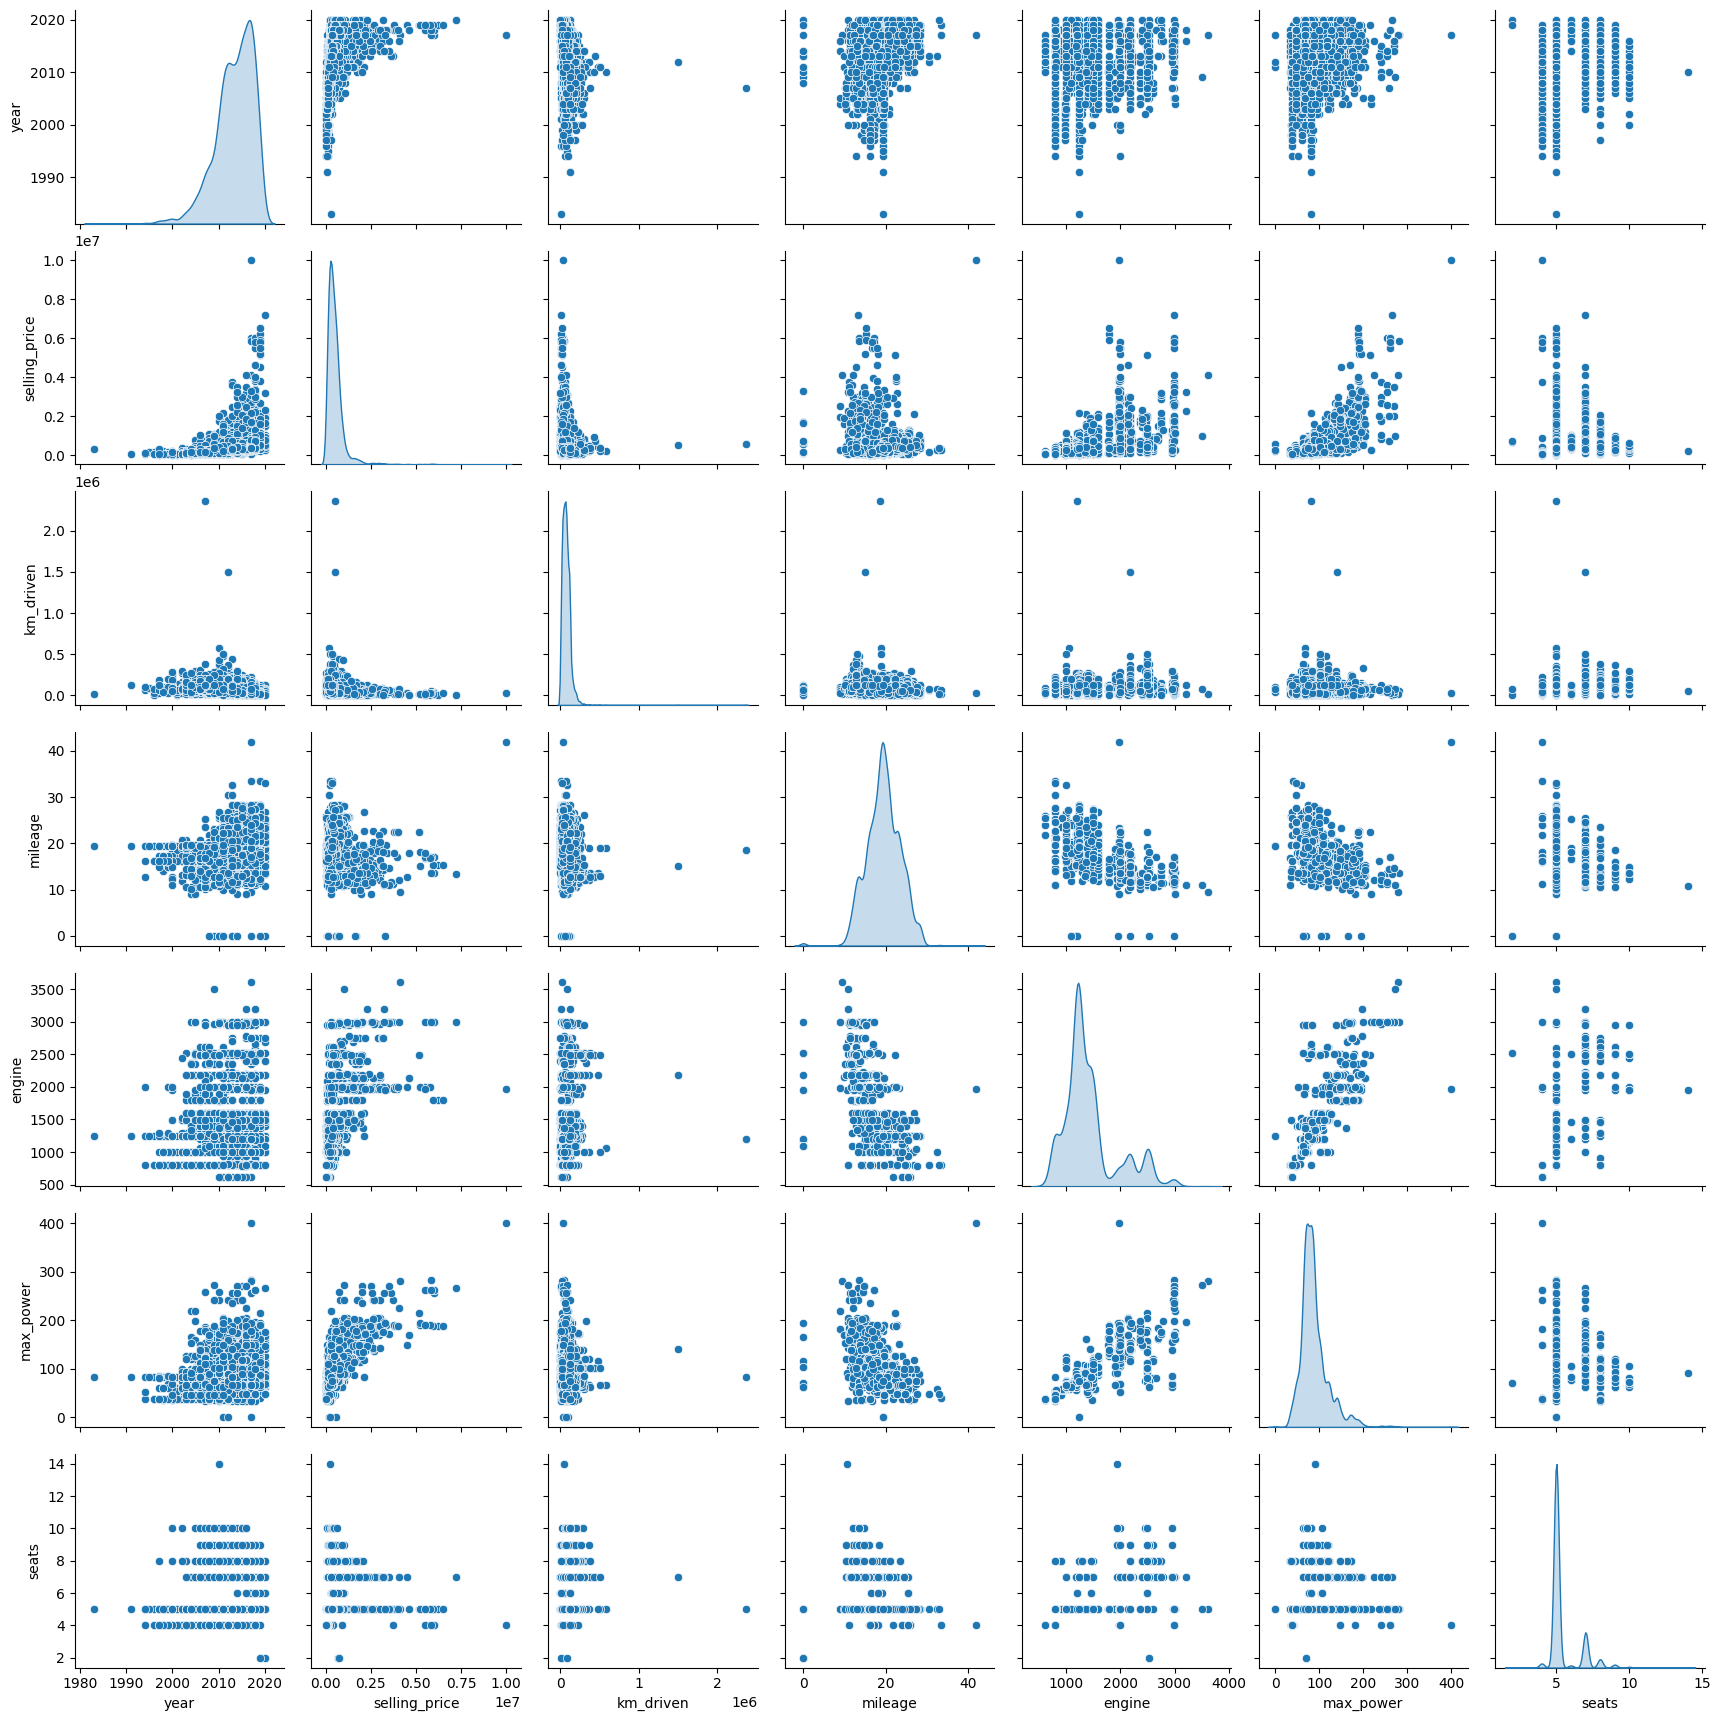

In [ ]:
sns.pairplot(df_train.loc[:, df_train.dtypes != 'object'], diag_kind="kde")

(0.25 балла) Постройте pairplot по тестовым данным и ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

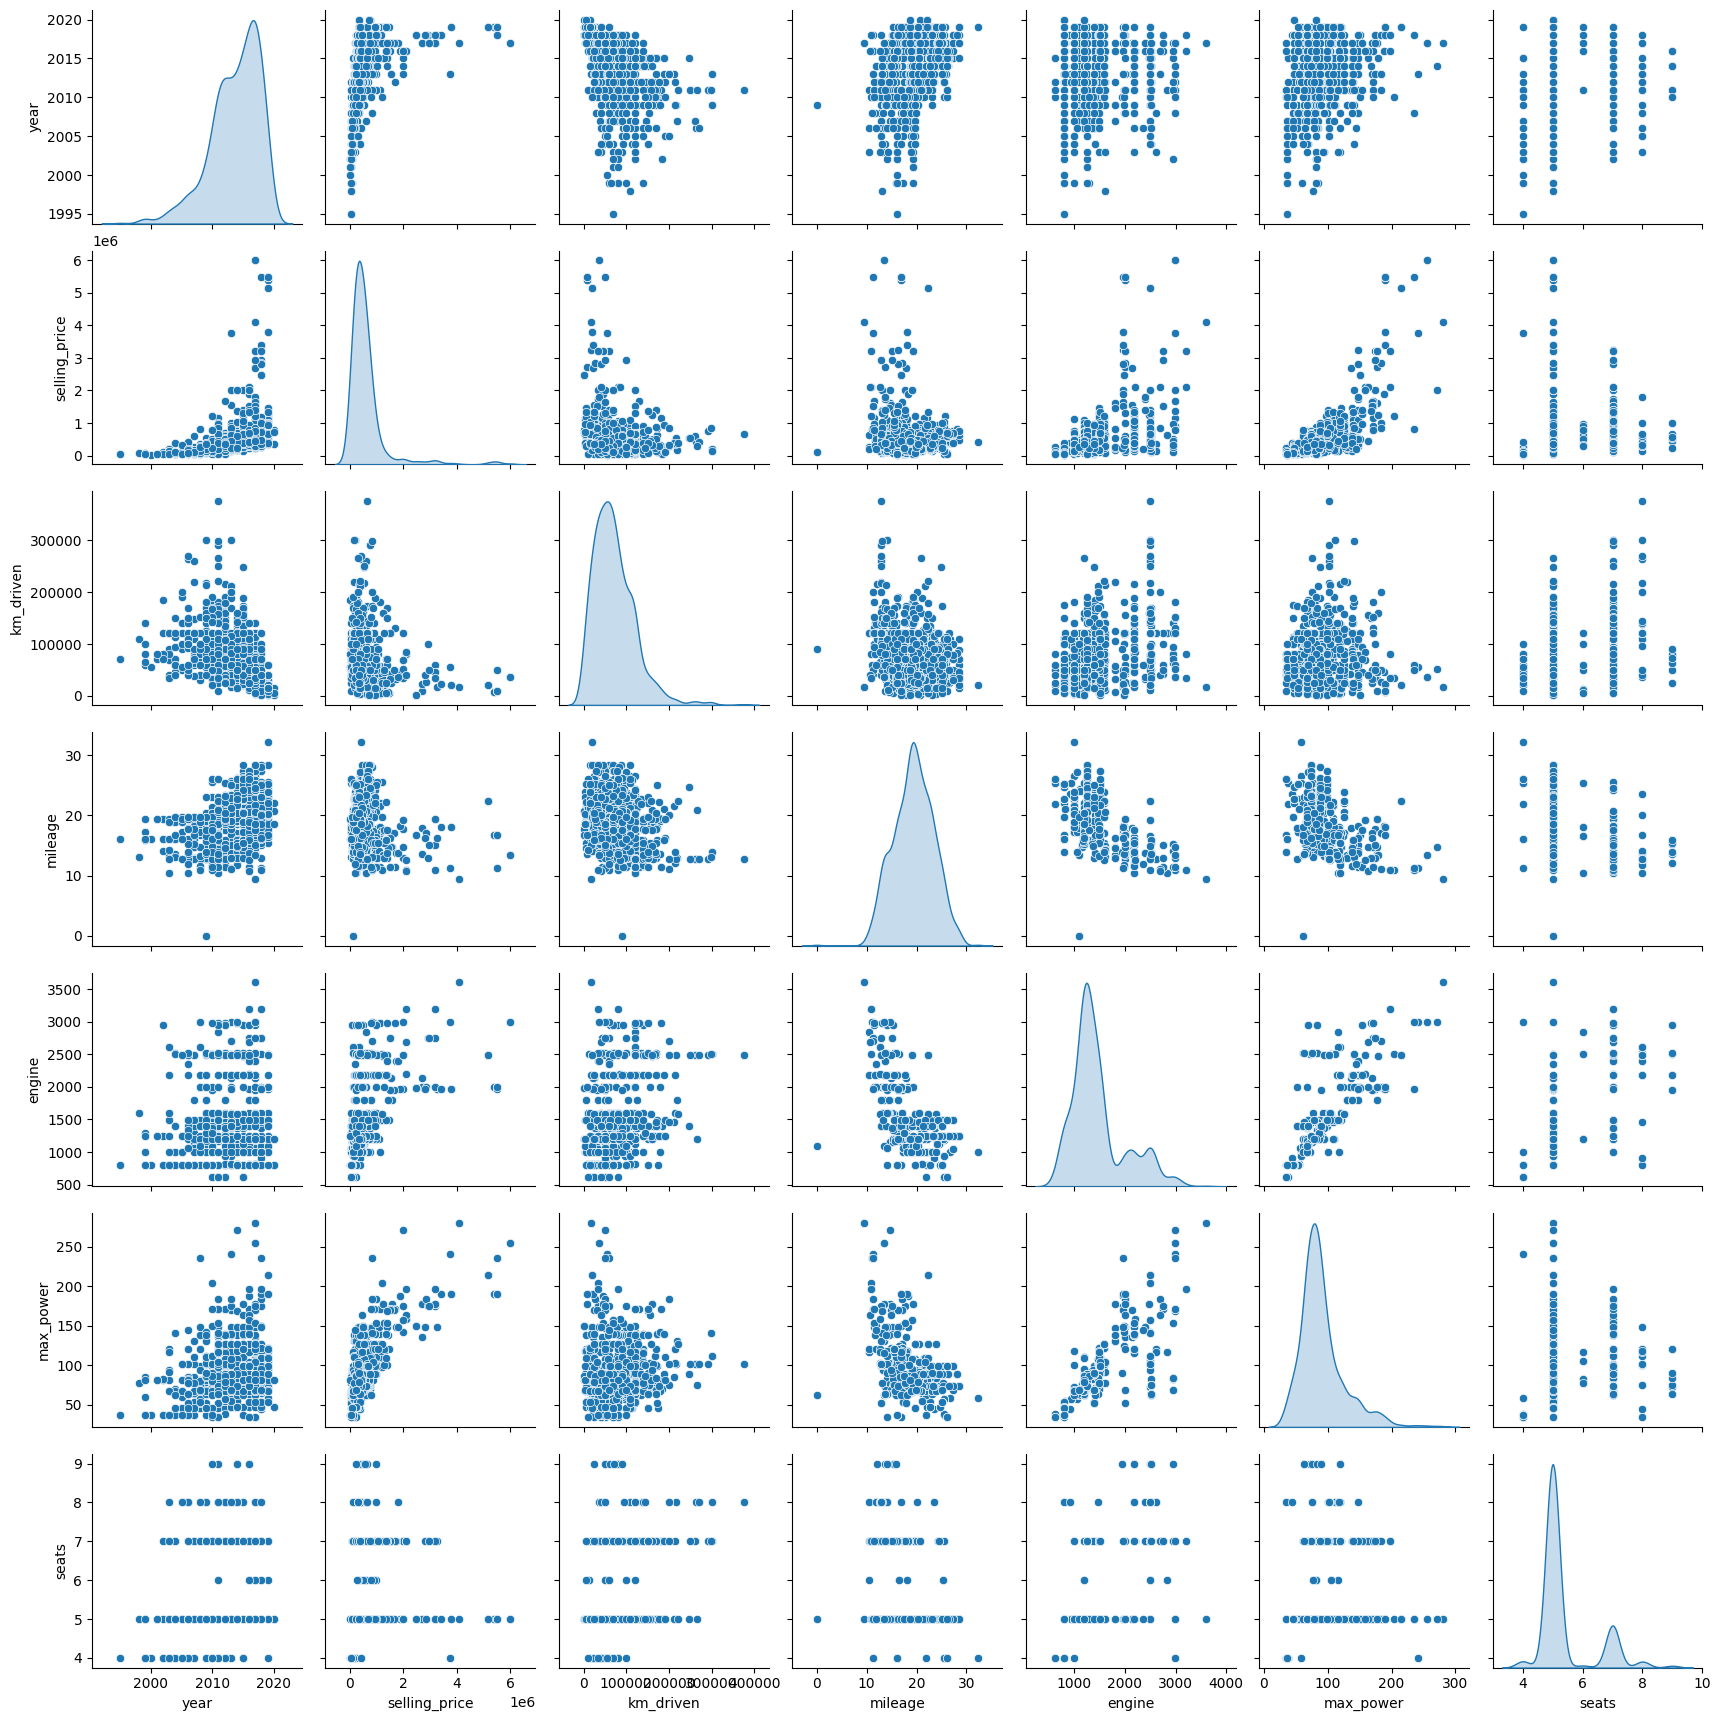

In [ ]:
sns.pairplot(df_test.loc[:, df_test.dtypes != 'object'], diag_kind="kde")

(0.25 балла) Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок

<Axes: >

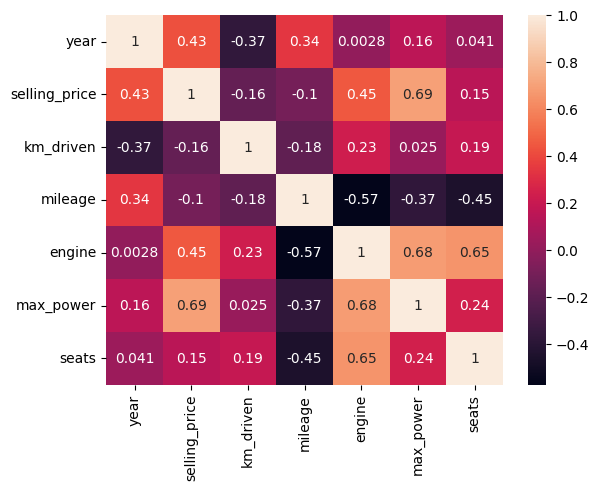

In [ ]:
sns.heatmap(df_train.loc[:, df_train.dtypes != 'object'].corr(), annot=True)

Ответьте, пожалуйста, на вопросы:

Какие 2 признака наименее скоррелированы между собой? - *year & engine*

Между какими наблюдается довольно сильная положительная линейная зависимость? - *(engine & seats) , (engine & max_power) (selling price & max_power)*

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. - *нет, не првильно, зависимость скорее обратна это видно и по коъффициенту корреляции и по графику распределения*

(0.25 балла) Отобразите диаграммe рассеяния для наиболее скореллированной пары признаков (на трейне)

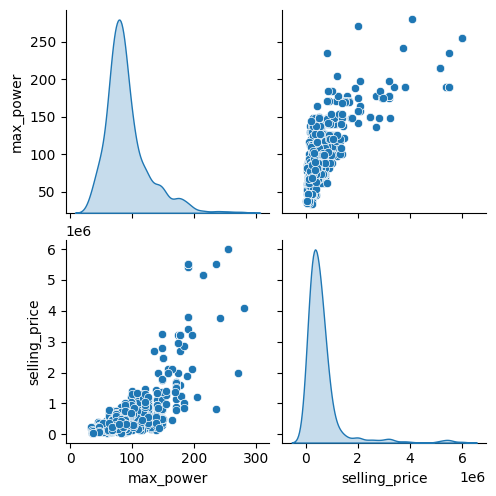

In [ ]:
sns.pairplot(df_test[['max_power', 'selling_price']], diag_kind="kde")

Дополнительные визуализации (бонус 0.5 балла)
Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

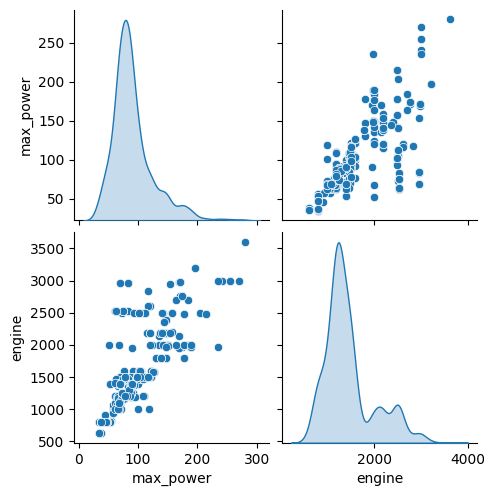

In [ ]:
sns.pairplot(df_test[['max_power', 'engine']], diag_kind="kde")

Это вторая по силе корреляции пара признаков, что свидетельствуют и сильной линейной зависисмости между данными признаками. А мы помним, что линейные модели чуствиетльны к зависимым признакам и на этапе обучения надо будет это учесть

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) В переменные y_train и y_test запишите значения целевых переменных. Столбцы selling_price из датафреймов необходимо удалить. Категориальные (все, кроме seats) столбцы тоже.

In [ ]:
y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [ ]:
df_train.loc[:, df_train.dtypes != 'object']

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.40,1248,74.00,5
1,2014,370000,120000,21.14,1498,103.52,5
2,2010,225000,127000,23.00,1396,90.00,5
3,2007,130000,120000,16.10,1298,88.20,5
4,2017,440000,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...,...
6992,2008,120000,191000,17.92,1086,62.10,5
6993,2013,260000,50000,18.90,998,67.10,5
6994,2013,320000,110000,18.50,1197,82.85,5
6995,2007,135000,119000,16.80,1493,110.00,5


In [ ]:
X_train = df_train.loc[:, df_train.dtypes != 'object'].drop(['selling_price'], axis=1)
X_test = df_test.loc[:, df_test.dtypes != 'object'].drop(['selling_price'], axis=1)

In [ ]:
assert X_train.shape == (5840, 6)

assert X_test.shape == (1000, 6)

(0.2 балла) Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте 
 и MSE для трейна и для теста

Замечание: 
 и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_lnr = lnr.predict(X_test)

In [ ]:
r2_score(y_test, pred_lnr), MSE(y_test, pred_lnr)

(0.5941419794788428, 233298779730.45486)

Запомните правило:

Использую линейную модель -- стандартизирую фичи

(0.25 балла) Воспользуемся им

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

array([[ 0.13956959,  1.19115249,  0.995867  , -0.37364298, -0.43955049,
        -0.43441899],
       [ 0.13956959,  0.76661943,  0.42883018,  0.14116151,  0.49351327,
        -0.43441899],
       [-0.83716668,  0.88315792,  0.8955065 , -0.06887872,  0.06617512,
        -0.43441899],
       ...,
       [-0.10461448,  0.60013588, -0.2335491 , -0.4786631 , -0.15982101,
        -0.43441899],
       [-1.56971888,  0.74997108, -0.66008122,  0.13086542,  0.69833214,
        -0.43441899],
       [-1.08135075,  0.76661943, -0.03282811, -0.37364298, -0.44271128,
        -0.43441899]])

In [ ]:
X_train = pd.DataFrame(std.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(std.fit_transform(X_test), columns=X_train.columns)

In [ ]:
lnr.fit(X_train, y_train)
pred_lnr = lnr.predict(X_test)
r2_score(y_test, pred_lnr), MSE(y_test, pred_lnr)

(0.5653757516430657, 249834428928.461)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. "Какой признак оказался наиболее информативным в предсказании цены?"

In [ ]:
lnr.coef_ # year

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

(0.25 балла) Теперь попробуем Lasso-регрессию. Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)
r2_score(y_test, pred_lasso), MSE(y_test, pred_lasso)

(0.5653744969752263, 249835150147.36295)

Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?

In [ ]:
lasso.coef_ # не занулили, так как alpha по умолчанию стоит 1.0

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

(0.25 балла) Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии

Вам пригодится класс GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': np.arange(0.5, 3, 0.1),
    'random_state': [42]
}

gds = GridSearchCV(lasso, params, cv=10)

In [ ]:
%%time
gds.fit(X_train, y_train)
pred_gds_lasso = gds.best_estimator_.predict(X_test)
r2_score(y_test, pred_gds_lasso), MSE(y_test, pred_gds_lasso)

CPU times: user 2.54 s, sys: 2.07 s, total: 4.61 s
Wall time: 2.43 s


(0.565372110140488, 249836522168.12814)

In [ ]:
gds.best_params_

{'alpha': 2.8999999999999995, 'random_state': 42}

In [ ]:
 gds.best_estimator_.coef_

array([152772.02503176, -44155.54858672,  28828.48662935,  61164.4632355 ,
       322809.93358546, -23200.77147963])

Сколько грид-сёрчу пришлось обучать моделей? - CPU times: user 2.54 s, sys: 2.07 s, total: 4.61 s
Wall time: 2.43 s *Курсив*

Какой коэффициент регуляризации у лучшей из перебранных моделей? - 'alpha': 2.8999999999999995*



Занулились ли какие-нибудь из весов при такой регуляризации? - *нет*

(0.25 балла) Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для ElasticNet-регрессии

In [ ]:
from sklearn.linear_model import ElasticNet

elst = ElasticNet()
params = {
    'alpha': np.arange(0.5, 3, 0.1),
    'l1_ratio': np.arange(0.0, 1.0, 0.1),
    'random_state': [42]
}

gds = GridSearchCV(elst, params, cv=10)

In [ ]:
%%time
gds.fit(X_train, y_train)
pred_gds_elst= gds.best_estimator_.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.530e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.424e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

CPU times: user 38.2 s, sys: 33.3 s, total: 1min 11s
Wall time: 52.8 s


In [ ]:
r2_score(y_test, pred_gds_elst), MSE(y_test, pred_gds_elst)

(0.5328003454871582, 268559702598.39706)

Какие гиперпараметры соответствуют лучшей из перебранных моделей? - {'alpha': 1.4999999999999998, 'l1_ratio': 0.9, 'random_state': 42}

In [ ]:
gds.best_params_

{'alpha': 1.4999999999999998, 'l1_ratio': 0.9, 'random_state': 42}

In [ ]:
 gds.best_estimator_.coef_

array([142285.97988682, -46199.0715452 ,  20366.57384119,  82462.95881121,
       266766.4121874 , -22959.76356008])

# Часть 3 (0.75 балла) | Добавляем категориальные фичи

(0 баллов) Из df_train удалите столбцы с целевой переменной и названием автомобиля.

In [ ]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)

In [ ]:
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
cat = X_train_cat.describe(include='object').columns.to_list() + ['seats']

In [ ]:
X_train_cat[cat]

,fuel,seller_type,transmission,owner,seats
0,Diesel,Individual,Manual,First Owner,5
1,Diesel,Individual,Manual,Second Owner,5
2,Diesel,Individual,Manual,First Owner,5
3,Petrol,Individual,Manual,First Owner,5
4,Petrol,Individual,Manual,First Owner,5
...,...,...,...,...,...
6992,Petrol,Individual,Manual,First Owner,5
6993,Petrol,Individual,Manual,Second Owner,5
6994,Petrol,Individual,Manual,First Owner,5
6995,Diesel,Individual,Manual,Fourth & Above Owner,5


(0.5 балла) Закодируйте категориалльные фичи и seats методом OneHot-кодирования

Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehe = OneHotEncoder(drop='first')
df = onehe.fit_transform(X_train_cat[cat])

In [ ]:
X_train_cat['seats'].value_counts()

5     4618
7      800
8      191
4       94
9       68
6       48
10      18
2        2
14       1
Name: seats, dtype: int64

In [ ]:
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=cat)

In [ ]:
X_test_cat = pd.get_dummies(X_test_cat, drop_first=True, columns=cat)

(0.25 балла) Переберите параметр регуляризации alpha для гребневой (ridge) регрессии с помощью класса GridSearchCV. В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества 
. Кроссвалидируйтесь по 10-ти фолдам.

Удалось ли улучшить качество предсказаний?

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {
    'alpha': np.arange(0.5, 3, 0.1),
    'random_state': [42]
}

gds = GridSearchCV(ridge, params, cv=10)

In [ ]:
X_train_cat.shape, y_train.shape

((6999, 24), (5840,))

In [ ]:
%%time
gds.fit(X_train_cat, y_train)
pred_gds_ridge = gds.best_estimator_.predict(X_test_cat)

ValueError: ignored